# <font color='red'>SGD Algorithm to predict movie ratings</font>

**There will be some functions that start with the word "grader" ex: grader_matrix(), grader_mean(), grader_dim() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. The data will be of this format, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

In [1]:
# Importing the required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.sparse import csr_matrix

In [2]:
#loading the required file
movie_rating = pd.read_csv('ratings_train.csv')
movie_rating.head()
movie_rating.shape[0]

89992

## <font color='red'>Task 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $





*.  We will be giving you some functions, please write code in that functions only.

*.  After every function, we will be giving you expected output, please make sure that you get that output. 





1. Construct adjacency matrix with the given data, assuming its  <a href='https://en.wikipedia.org/wiki/Bipartite_graph'> weighted un-directed bi-partited graph</a> and the weight of each edge is the rating given by user to the movie

<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>

   you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

   Hint : you can create adjacency matrix using <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html'> csr_matrix</a>


In [3]:
# from scipy.linalg import svd
# U, sigma, V_T = svd(adjacent_matrix)

In [4]:
# U.shape, sigma.shape, V_T.shape


2. We will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

   *.  So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

   *. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie.
3. Compute $\mu$ , $\mu$  represents the mean of all the rating given in the dataset.(write your code in <font color='blue'>def m_u()</font>)
4. For each unique user initilize a bias value $B_{i}$ to zero, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user (write your code in <font color='blue'>def initialize()</font>)

5. For each unique movie initilize a bias value $C_{j}$ zero, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie (write your code in <font color='blue'>def initialize()</font>)

6. Compute dL/db_i (Write you code in <font color='blue'> def derivative_db()</font>)
7. Compute dL/dc_j(write your code in <font color='blue'> def derivative_dc()</font>

8. Print the mean squared error with predicted ratings.

<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
predict the ratings with formula
</pre>
$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>
  
10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 

<br>

 # <font color='red'>Task 2 </font>

<br>


<br>

<font color='red'> Reading the csv file </font>

In [5]:
#displaying sample contents
import pandas as pd
data=pd.read_csv('ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [6]:
data.shape

(89992, 3)

In [7]:
#doing the initilisation
import pandas as pd
user_info_data=pd.read_csv('ratings_train.csv')
µ   = np.mean(user_info_data['rating'])
b_i = np.ones(user_info_data.shape[0]) * 0.1
c_i = np.ones(user_info_data.shape[0]) * 0.1
u_i = user_info_data['user_id']
v_j = user_info_data['item_id']

ratings_details  = user_info_data['rating'].tolist()
users_details    = u_i.tolist()
movies_details   = v_j.tolist()

len(np.unique(ratings_details)), len(np.unique(users_details)), len(np.unique(movies_details))

(5, 943, 1662)

<font color='red'>Create your adjacency matrix </font>

In [8]:
#creating adjacent matrix
from scipy.sparse import csr_matrix
adjacency_matrix = csr_matrix((ratings_details, (users_details,movies_details))).todense()

In [9]:
adjacency_matrix.shape

(943, 1681)

<font color='cyan'>Grader function - 1</font>

In [10]:
def grader_matrix(matrix):
  assert(matrix.shape==(943,1681))
  return True
grader_matrix(adjacency_matrix)

True

<font color='red'> SVD decompostion</font>

Sample code for SVD decompostion

In [11]:
#computing svd with components 5
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 5)
(5,)
(10, 5)


<font color='red'>Write your code for SVD decompostion</font>

In [12]:
# Please use adjacency_matrix as matrix for SVD decompostion
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(adjacency_matrix, n_components=943,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)
# You can choose n_components as your choice

(943, 943)
(943,)
(1681, 943)


<font color='red'>Compute mean of ratings</font>

In [13]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.
    

    return ratings.mean()

In [14]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='cyan'>Grader function -2 </font>

In [15]:
def grader_mean(mu):
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data['rating'])
grader_mean(mu)

True

<font color='red'>Initialize $B_{i}$ and $C_{j}$

Hint : Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [16]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros 
    # return output as a list of zeros 
    return np.zeros(dim) 

In [17]:
dim= U.shape[0] # give the number of dimensions for b_i (Here b_i corresponds to users)
b_i=initialize(dim)

In [18]:
dim= VT.shape[1] # give the number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(dim)

<font color='cyan'>Grader function -3 </font>

In [19]:
def grader_dim(b_i,c_j):
  assert(len(b_i)==943 and np.sum(b_i)==0)
  assert(len(c_j)==1681 and np.sum(c_j)==0)
  return True
grader_dim(b_i,c_j)

True

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<font color='red'>Compute dL/db_i</font>

In [20]:
def derivative_db(user_id,item_id,rating,U1,V1,mu,alpha):
    '''In this function, we will compute dL/db_i'''
    first_term  =  2 * alpha * b_i[user_id]
    second_term = -2 * (rating - mu - b_i[user_id] - c_j[item_id]- (np.dot(U1[user_id], V1.T[item_id])))
    derivative_of_db_i = first_term + second_term
    return derivative_of_db_i


<font color='cyan'>Grader function -4 </font>

In [21]:
def grader_db(value):
    assert(np.round(value,3)==-0.931)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_db(312,98,4,U1,V1,mu,alpha)
print(value)
grader_db(value)

-0.9308283758773337


True

<font color='red'>Compute dL/dc_j</font>

In [22]:
def derivative_dc(user_id,item_id,rating,U1,V1,mu,alpha):
    '''In this function, we will compute dL/dc_j'''
    first_term  =  2 * alpha * c_j[user_id]
    second_term = -2 * (rating - mu - b_i[user_id] - c_j[item_id]- (np.dot(U1[user_id], V1.T[item_id])))
    derivative_of_dc_j =  first_term + second_term 
    return derivative_of_dc_j


<font color='cyan'>Grader function - 5 </font>

In [23]:
def grader_dc(value):
    assert(np.round(value,3)==-2.929)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
r=0.01 
value=derivative_dc(58,504,5,U1,V1,mu,alpha)
print(value)
grader_dc(value)

-2.9290787114434913


True

<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


for each epoch, print the MSE value

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

In [24]:
''' This was my inital try'''
# from tqdm import tqdm
# import random

# def predictions(users_details,movies_details,b_i, c_j):
#     all_predictions = []
#     for bi, cj, usrid, mvid in zip(b_i, c_j,users_details,movies_details):
#         prediction = (mu - bi - cj - (np.dot(usrid, mvid)))
#         all_predictions.append(prediction)
#     return all_predictions
# '''  intintializing the values '''
# learning_rate = alpha = 0.01
# ''' Looping through each epoch '''
# for each_point in tqdm(range(0, 20)):
#     ''' Iterating for each batch '''
#     for usr_id, itm_id, ratngs in zip(u_i,v_j,ratings_details):
#         ''' Getting random index '''
#         b_i = b_i - learning_rate * derivative_db(usr_id,itm_id,ratngs,U,VT,mu,alpha)
#         c_j = c_j - learning_rate * derivative_dc(usr_id,itm_id,ratngs,U,VT,mu,alpha)
#     ''' stroing the optimized weigths and bais for each epoch'''
#     model_preditions = predictions(u_i,v_j,b_i, c_j)
        

' This was my inital try'

In [25]:
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
# required details
learning_rate= 0.001
y=ratings_details
all_predictions = []
#running through 50 epochs
for epoch in tqdm(range(50)):
    #for all records of userdetails
    for user_id,item_id,rating in zip(users_details,movies_details,ratings_details):
        #calculating the derivates of b_i & c_j
        b_i[user_id]= b_i[user_id] - learning_rate *derivative_db(user_id,item_id,rating,U,VT,mu,r)
        c_j[item_id]= c_j[item_id] - learning_rate *derivative_dc(user_id,item_id,rating,U,VT,mu,r)
    #calculating hte predicitons after each epoch
    y_pred=[]
    for user_id,item_id in zip(users_details,movies_details):
        y_pred.append(mu+b_i[user_id]+c_j[item_id]+( np.dot(U[user_id].T, VT.T[item_id]) ) )
    #calculating mse for each epoch 
    all_predictions.append(mean_squared_error(ratings_details,y_pred))

100%|██████████| 50/50 [01:17<00:00,  1.55s/it]


Text(0, 0.5, 'loss')

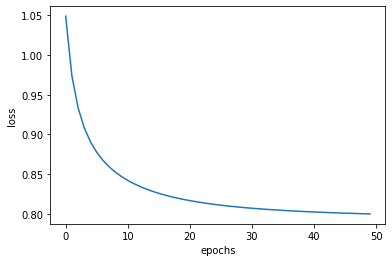

In [26]:
import matplotlib.pyplot as plt
#plotting results
plt.plot(all_predictions)
plt.xlabel('epochs')
plt.ylabel('loss')


In [27]:
model_predictions = []
for user_id,item_id in zip(users_details,movies_details):
        model_predictions.append(mu+b_i[user_id]+c_j[item_id]+(np.dot(U[user_id].T,VT.T[item_id])))

In [28]:
model_predictions

[2.7611824800809774,
 4.059265007772838,
 3.884913542263527,
 3.63837658315012,
 4.235702221797333,
 3.2313053811216133,
 4.0963460897476285,
 3.882127157897883,
 3.887364309072743,
 2.841358113657961,
 3.0146833340519334,
 4.140630734252557,
 3.5062154752840877,
 3.3597031437355644,
 2.8093818371144974,
 3.6688883924342455,
 3.2857568867308906,
 3.880827861813851,
 3.8711143969360147,
 2.736400113327132,
 4.163455229179991,
 4.346155615152665,
 3.5446831223164565,
 3.5773667055441467,
 4.11342671568928,
 4.4356967135003655,
 3.997604073933184,
 3.810257164397943,
 3.8461975818423544,
 3.3603395580648865,
 4.100828933260428,
 3.83488334074237,
 3.8771297945664043,
 3.143953078003329,
 3.5551648648206284,
 2.6049604503952737,
 3.427107774050581,
 3.9560971258336126,
 4.10538488665526,
 4.521356017148614,
 4.269060014541589,
 4.3400658530948295,
 3.7072102860776264,
 3.763135437213109,
 2.7098609458403846,
 3.119887006615999,
 3.337668582419138,
 3.3996808178286138,
 3.762283005142332,
 

In [29]:
# len(users_details), len(movies_details)
len(u_i),len(v_j),len(all_predictions)

(89992, 89992, 50)

<br>

<font color='red'> Task 2</font>

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

In [30]:
import pandas as pd

In [31]:
U.shape

(943, 943)

In [32]:
data = pd.read_csv('user_info.csv.txt')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 4 columns):
user_id         943 non-null int64
age             943 non-null int64
is_male         943 non-null int64
orig_user_id    943 non-null int64
dtypes: int64(4)
memory usage: 29.6 KB


In [33]:
np_age = np.array(data['age'])

In [34]:
#adding the new axis of age to users
age_newaxis = np_age[:,np.newaxis]
age_newaxis.shape

(943, 1)

In [35]:
user_info_new_data = np.hstack((U, age_newaxis))

In [36]:
user_info_new_data.shape

(943, 944)

In [37]:
#appyling logestic regression on the data
from sklearn.linear_model import LogisticRegression

User_models = LogisticRegression(random_state=0).fit(user_info_new_data, data['is_male'], )


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
#doing model predictions
model_predictions = User_models.predict(user_info_new_data)

In [39]:
#check f1 scrore metris
from sklearn.metrics import f1_score, accuracy_score
f1_score(list(data['is_male']),list(model_predictions),average='micro')

0.7104984093319194

In [40]:
#checking the accuracy
accuracy_score(list(data['is_male']),list(model_predictions))

0.7104984093319194

''' 
     1. Even data is important *** 
     2. This assignment gave intution of adjacent matrix - SVD 
     3. After adding other features how it behavous show in task-2 
'''